In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('1DataCoSupplyChainDataset.csv',encoding='latin-1')
df.head(50)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4.0,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4.0,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4.0,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4.0,NaN,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4.0,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4.0,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1.0,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1.0,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 10:21,First Class
8,CASH,3,2.0,NaN,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 10:00,Second Class
9,CASH,2,1.0,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 9:39,First Class


### ------------------- DATA CLEANING AND EDA  -----------------------


In [3]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [4]:
dfTemp = df[['order date (DateOrders)','Order Item Total','Order Item Id','Product Card Id',
            'Customer Id','Customer Segment',
            'Days for shipping (real)','shipping date (DateOrders)',
            'Product Price','Shipping Mode','Type','Order Item Quantity','Order Item Discount','Order Profit Per Order']].copy()
dfTemp.head(50)

,order date (DateOrders),Order Item Total,Order Item Id,Product Card Id,Customer Id,Customer Segment,Days for shipping (real),shipping date (DateOrders),Product Price,Shipping Mode,Type,Order Item Quantity,Order Item Discount,Order Profit Per Order
0,1/31/2018 22:56,314.640015,180517.0,1360,20755.0,Consumer,3,02-03-2018 22:56,327.750000,Standard Class,DEBIT,1,13.110000,91.250000
1,1/13/2018 12:27,311.359985,179254.0,1360,19492.0,Consumer,5,1/18/2018 12:27,327.750000,Standard Class,TRANSFER,1,16.389999,-249.089996
2,1/13/2018 12:06,309.720001,179253.0,1360,19491.0,Consumer,4,1/17/2018 12:06,327.750000,Standard Class,CASH,1,18.030001,-247.779999
3,1/13/2018 11:45,304.809998,179252.0,1360,19490.0,Home Office,3,1/16/2018 11:45,327.750000,Standard Class,DEBIT,1,22.940001,22.860001
4,1/13/2018 11:24,298.250000,179251.0,1360,19489.0,Corporate,2,1/15/2018 11:24,327.750000,Standard Class,PAYMENT,1,29.500000,134.210007
5,1/13/2018 11:03,294.980011,179250.0,1360,19488.0,Consumer,6,1/19/2018 11:03,327.750000,Standard Class,TRANSFER,1,32.779999,18.580000
6,1/13/2018 10:42,288.420013,179249.0,1360,19487.0,Home Office,2,1/15/2018 10:42,327.750000,First Class,DEBIT,1,39.330002,95.180000
7,1/13/2018 10:21,285.140015,179248.0,1360,19486.0,Corporate,2,1/15/2018 10:21,327.750000,First Class,TRANSFER,1,42.610001,68.430000
8,1/13/2018 10:00,278.589996,179247.0,1360,19485.0,Corporate,3,1/16/2018 10:00,327.750000,Second Class,CASH,1,49.160000,133.720001
9,1/13/2018 9:39,275.309998,179246.0,1360,19484.0,Corporate,2,1/15/2018 9:39,327.750000,First Class,CASH,1,52.439999,132.149994


In [5]:
dfTemp.columns

Index(['order date (DateOrders)', 'Order Item Total', 'Order Item Id',
       'Product Card Id', 'Customer Id', 'Customer Segment',
       'Days for shipping (real)', 'shipping date (DateOrders)',
       'Product Price', 'Shipping Mode', 'Type', 'Order Item Quantity',
       'Order Item Discount', 'Order Profit Per Order'],
      dtype='object')

In [6]:
dfTemp.rename(
    columns={'order date (DateOrders)':"Order Date", 'Order Item Total':'Order Total','Product Card Id':'Product Id',
             'Days for shipping (real)':'Shipping Duration','Order Profit Per Order':'Profit Per Order','shipping date (DateOrders)':'Shipping Date',
             'Order Item Discount':'Total Discount','Order Item Quantity':'Total Quantity','Type':'Payment Type'
            },
    inplace = True
)

In [7]:
dfTemp.head(50)

,Order Date,Order Total,Order Item Id,Product Id,Customer Id,Customer Segment,Shipping Duration,Shipping Date,Product Price,Shipping Mode,Payment Type,Total Quantity,Total Discount,Profit Per Order
0,1/31/2018 22:56,314.640015,180517.0,1360,20755.0,Consumer,3,02-03-2018 22:56,327.750000,Standard Class,DEBIT,1,13.110000,91.250000
1,1/13/2018 12:27,311.359985,179254.0,1360,19492.0,Consumer,5,1/18/2018 12:27,327.750000,Standard Class,TRANSFER,1,16.389999,-249.089996
2,1/13/2018 12:06,309.720001,179253.0,1360,19491.0,Consumer,4,1/17/2018 12:06,327.750000,Standard Class,CASH,1,18.030001,-247.779999
3,1/13/2018 11:45,304.809998,179252.0,1360,19490.0,Home Office,3,1/16/2018 11:45,327.750000,Standard Class,DEBIT,1,22.940001,22.860001
4,1/13/2018 11:24,298.250000,179251.0,1360,19489.0,Corporate,2,1/15/2018 11:24,327.750000,Standard Class,PAYMENT,1,29.500000,134.210007
5,1/13/2018 11:03,294.980011,179250.0,1360,19488.0,Consumer,6,1/19/2018 11:03,327.750000,Standard Class,TRANSFER,1,32.779999,18.580000
6,1/13/2018 10:42,288.420013,179249.0,1360,19487.0,Home Office,2,1/15/2018 10:42,327.750000,First Class,DEBIT,1,39.330002,95.180000
7,1/13/2018 10:21,285.140015,179248.0,1360,19486.0,Corporate,2,1/15/2018 10:21,327.750000,First Class,TRANSFER,1,42.610001,68.430000
8,1/13/2018 10:00,278.589996,179247.0,1360,19485.0,Corporate,3,1/16/2018 10:00,327.750000,Second Class,CASH,1,49.160000,133.720001
9,1/13/2018 9:39,275.309998,179246.0,1360,19484.0,Corporate,2,1/15/2018 9:39,327.750000,First Class,CASH,1,52.439999,132.149994


In [8]:
# 314.64 = Consumer
# 304.80 = Home Office 
# 298.25 = Corporate

In [9]:
dfTemp.isnull().sum()

Order Date             0
Order Total          452
Order Item Id        439
Product Id             0
Customer Id          551
Customer Segment       0
Shipping Duration      0
Shipping Date          0
Product Price          0
Shipping Mode        679
Payment Type           0
Total Quantity         0
Total Discount         0
Profit Per Order       0
dtype: int64

<Axes: >

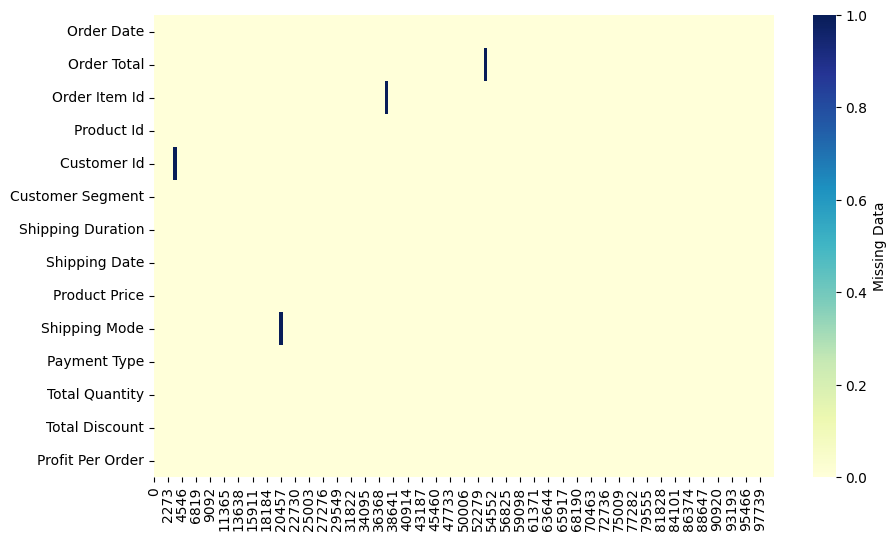

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(dfTemp.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [11]:
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Date         99998 non-null  object 
 1   Order Total        99546 non-null  float64
 2   Order Item Id      99559 non-null  float64
 3   Product Id         99998 non-null  int64  
 4   Customer Id        99447 non-null  float64
 5   Customer Segment   99998 non-null  object 
 6   Shipping Duration  99998 non-null  int64  
 7   Shipping Date      99998 non-null  object 
 8   Product Price      99998 non-null  float64
 9   Shipping Mode      99319 non-null  object 
 10  Payment Type       99998 non-null  object 
 11  Total Quantity     99998 non-null  int64  
 12  Total Discount     99998 non-null  float64
 13  Profit Per Order   99998 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 10.7+ MB


In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
dfTemp[['Customer Segment','Shipping Mode','Payment Type']]  = oe.fit_transform(dfTemp[['Customer Segment','Shipping Mode','Payment Type']])

In [13]:
from miceforest import ImputationKernel
ker = ImputationKernel(
    data = dfTemp.drop(['Order Date','Shipping Date'],axis=1),
    random_state=12345
)
ker.mice(3)
dfBase = ker.complete_data()

In [14]:
dfBase

,Order Total,Order Item Id,Product Id,Customer Id,Customer Segment,Shipping Duration,Product Price,Shipping Mode,Payment Type,Total Quantity,Total Discount,Profit Per Order
0,314.640015,180517.0,1360,20755.0,0.0,3,327.75,3.0,1.0,1,13.110000,91.250000
1,311.359985,179254.0,1360,19492.0,0.0,5,327.75,3.0,3.0,1,16.389999,-249.089996
2,309.720001,179253.0,1360,19491.0,0.0,4,327.75,3.0,0.0,1,18.030001,-247.779999
3,304.809998,179252.0,1360,19490.0,2.0,3,327.75,3.0,1.0,1,22.940001,22.860001
4,298.250000,179251.0,1360,19489.0,1.0,2,327.75,3.0,2.0,1,29.500000,134.210007
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,143.940002,95540.0,1014,2084.0,1.0,5,49.98,2.0,1.0,3,6.000000,64.769997
99994,181.929993,95536.0,1014,6098.0,0.0,1,49.98,1.0,1.0,4,17.990000,30.930000
99995,179.929993,95530.0,1014,3817.0,1.0,4,49.98,3.0,1.0,4,19.990000,-149.880005
99996,87.959999,95521.0,1014,8308.0,0.0,4,49.98,3.0,2.0,2,12.000000,-19.790001


In [15]:
dfBase['Order Date'] = (pd.to_datetime(dfTemp['Order Date'],format='mixed').dt.date).astype('datetime64[ns]')
dfBase['Shipping Date'] = (pd.to_datetime(dfTemp['Shipping Date'],format='mixed').dt.date).astype('datetime64[ns]')

In [16]:
dfBase['Order Total'] = round(dfBase['Order Total'],2)
dfBase['Total Discount'] = round(dfBase['Total Discount'],2)
dfBase['Profit Per Order'] = round(dfBase['Profit Per Order'],2)

In [17]:
dfBase

,Order Total,Order Item Id,Product Id,Customer Id,Customer Segment,Shipping Duration,Product Price,Shipping Mode,Payment Type,Total Quantity,Total Discount,Profit Per Order,Order Date,Shipping Date
0,314.64,180517.0,1360,20755.0,0.0,3,327.75,3.0,1.0,1,13.11,91.25,2018-01-31,2018-02-03
1,311.36,179254.0,1360,19492.0,0.0,5,327.75,3.0,3.0,1,16.39,-249.09,2018-01-13,2018-01-18
2,309.72,179253.0,1360,19491.0,0.0,4,327.75,3.0,0.0,1,18.03,-247.78,2018-01-13,2018-01-17
3,304.81,179252.0,1360,19490.0,2.0,3,327.75,3.0,1.0,1,22.94,22.86,2018-01-13,2018-01-16
4,298.25,179251.0,1360,19489.0,1.0,2,327.75,3.0,2.0,1,29.50,134.21,2018-01-13,2018-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,143.94,95540.0,1014,2084.0,1.0,5,49.98,2.0,1.0,3,6.00,64.77,2016-07-12,2016-07-17
99994,181.93,95536.0,1014,6098.0,0.0,1,49.98,1.0,1.0,4,17.99,30.93,2016-07-12,2016-07-13
99995,179.93,95530.0,1014,3817.0,1.0,4,49.98,3.0,1.0,4,19.99,-149.88,2016-07-12,2016-07-16
99996,87.96,95521.0,1014,8308.0,0.0,4,49.98,3.0,2.0,2,12.00,-19.79,2016-07-12,2016-07-16


In [18]:
#  Calculation oF Gross Margin for each Customer
#  Revenue = Product Price + Discount
#  COGS = Order Total - Profit
# GM = (Revenue - COGS) / Revenue
cNumerator = ((dfBase['Product Price']*dfBase['Total Quantity']) + dfBase['Total Discount']
            - dfBase['Order Total']+dfBase['Profit Per Order'])
cRevenue = (dfBase['Product Price']*dfBase['Total Quantity']) + dfBase['Total Discount'] 
dfBase['Gross Margin'] = (cNumerator/cRevenue) * 100
dfBase['COGS'] = (dfBase['Order Total']-dfBase['Profit Per Order'])
dfBase['Revenue'] = round(cRevenue,3)
dfBase

,Order Total,Order Item Id,Product Id,Customer Id,Customer Segment,Shipping Duration,Product Price,Shipping Mode,Payment Type,Total Quantity,Total Discount,Profit Per Order,Order Date,Shipping Date,Gross Margin,COGS,Revenue
0,314.64,180517.0,1360,20755.0,0.0,3,327.75,3.0,1.0,1,13.11,91.25,2018-01-31,2018-02-03,34.462829,223.39,340.86
1,311.36,179254.0,1360,19492.0,0.0,5,327.75,3.0,3.0,1,16.39,-249.09,2018-01-13,2018-01-18,-62.855233,560.45,344.14
2,309.72,179253.0,1360,19491.0,0.0,4,327.75,3.0,0.0,1,18.03,-247.78,2018-01-13,2018-01-17,-61.229684,557.50,345.78
3,304.81,179252.0,1360,19490.0,2.0,3,327.75,3.0,1.0,1,22.94,22.86,2018-01-13,2018-01-16,19.601357,281.95,350.69
4,298.25,179251.0,1360,19489.0,1.0,2,327.75,3.0,2.0,1,29.50,134.21,2018-01-13,2018-01-15,54.082575,164.04,357.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,143.94,95540.0,1014,2084.0,1.0,5,49.98,2.0,1.0,3,6.00,64.77,2016-07-12,2016-07-17,49.230473,79.17,155.94
99994,181.93,95536.0,1014,6098.0,0.0,1,49.98,1.0,1.0,4,17.99,30.93,2016-07-12,2016-07-13,30.705336,151.00,217.91
99995,179.93,95530.0,1014,3817.0,1.0,4,49.98,3.0,1.0,4,19.99,-149.88,2016-07-12,2016-07-16,-49.974991,329.81,219.91
99996,87.96,95521.0,1014,8308.0,0.0,4,49.98,3.0,2.0,2,12.00,-19.79,2016-07-12,2016-07-16,3.760271,107.75,111.96


In [19]:
# aggre = {'Order Item Id':'count','Order Total':'sum','Order Date':['max','min'],'Gross Margin':'mean','Total Quantity':'sum'}
# aggreDf = dfBase.groupby('Customer Id').aggregate(aggre)
# aggreDf

### ---------------- Final DF -----------------------

In [20]:
# unique Customer Count
totalCorporateTransaction = dfBase['Order Item Id'].nunique()
totalUniqueCustomers = dfBase['Customer Id'].nunique()

aggre = {'Order Item Id':'count','Order Total':'sum','Order Date':['max','min'],'Gross Margin':'mean','Revenue':'mean',
         'COGS':'mean','Total Quantity':'mean','Total Discount':'mean','Profit Per Order':'mean'}
aggreDf = dfBase.groupby('Customer Id').agg(aggre)

# Flatten the column index
aggreDf.columns = [' '.join(col).strip() for col in aggreDf.columns.values]

# Reset the index to make 'Customer Id' a regular column
aggreDf.reset_index(inplace=True)

# Rename Columns
aggreDf.rename(
    columns={'Order Item Id count':'Total Transactions','Order Total sum':'Order Total','Gross Margin mean':'Avg. Gross Margin',
             'Revenue mean':'Avg. Revenue','COGS mean':'Avg. COGS','Total Quantity mean':'Avg. Total Quantity','Profit Per Order mean':'Avg. Profit',
             'Total Discount mean':'Avg. Discount'},
    inplace = True
)

# Duration between 1st and last transaction (in Days)
aggreDf['Customer LifeSpan ( Days )'] = (aggreDf['Order Date max'] - aggreDf['Order Date min']).apply(lambda x: max(x, pd.Timedelta(days=1)).days)

# Summation of LifeSpans of Customer in Month
LifeSpan = (aggreDf['Customer LifeSpan ( Days )'].sum() / 30 )
AvgLifeSpan = round(LifeSpan/totalUniqueCustomers,3)


aggreDf['Avg. LifeSpan'] = AvgLifeSpan
aggreDf['Avg. Order Value'] = round((aggreDf['Order Total']/aggreDf['Total Transactions']),3)
# aggreDf['Unique Customers'] = totalUniqueCustomers
aggreDf['CLV'] = round(
                            ( 
                                aggreDf['Avg. Order Value'] * 
                                aggreDf['Avg. Gross Margin'] * AvgLifeSpan * 36
                            )/ totalUniqueCustomers ,3
                        )

#/ totalUniqueCustomers

In [21]:
aggreDf

,Customer Id,Total Transactions,Order Total,Order Date max,Order Date min,Avg. Gross Margin,Avg. Revenue,Avg. COGS,Avg. Total Quantity,Avg. Discount,Avg. Profit,Customer LifeSpan ( Days ),Avg. LifeSpan,Avg. Order Value,CLV
0,1.0,1,472.45,2015-12-01,2015-12-01,40.703383,527.4500,312.7600,5.000000,27.500000,159.690000,1,10.812,472.450,428.403
1,2.0,5,856.92,2017-04-26,2016-05-09,39.583140,208.5800,129.4220,1.800000,18.598000,41.962000,352,10.812,171.384,151.129
2,3.0,6,615.82,2017-06-16,2015-12-12,-0.227927,123.3500,119.1750,1.166667,10.356667,-16.538333,552,10.812,102.637,-0.521
3,4.0,10,1040.53,2017-01-16,2015-05-12,18.503973,145.8970,138.5760,2.500000,20.922000,-34.523000,615,10.812,104.053,42.893
4,5.0,4,715.55,2016-10-31,2016-06-16,52.512937,243.5525,121.0025,2.750000,32.332500,57.885000,137,10.812,178.888,209.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,20752.0,1,215.82,2018-01-31,2018-01-31,47.998334,215.8200,112.2300,1.000000,0.000000,103.590000,1,10.812,215.820,230.772
17468,20754.0,1,172.66,2018-01-31,2018-01-31,-15.537876,258.9800,299.2200,1.000000,43.160000,-126.560000,1,10.812,172.660,-59.765
17469,20755.0,1,314.64,2018-01-31,2018-01-31,34.462829,340.8600,223.3900,1.000000,13.110000,91.250000,1,10.812,314.640,241.563
17470,20756.0,1,10.91,2018-01-31,2018-01-31,22.925226,12.1700,9.3800,1.000000,0.630000,1.530000,1,10.812,10.910,5.572


In [22]:
X = aggreDf[['Order Total','Customer LifeSpan ( Days )','Total Transactions','Avg. Profit','Avg. Total Quantity',]]
Y = aggreDf['CLV']

In [23]:
X

,Order Total,Customer LifeSpan ( Days ),Total Transactions,Avg. Profit,Avg. Total Quantity
0,472.45,1,1,159.690000,5.000000
1,856.92,352,5,41.962000,1.800000
2,615.82,552,6,-16.538333,1.166667
3,1040.53,615,10,-34.523000,2.500000
4,715.55,137,4,57.885000,2.750000
...,...,...,...,...,...
17467,215.82,1,1,103.590000,1.000000
17468,172.66,1,1,-126.560000,1.000000
17469,314.64,1,1,91.250000,1.000000
17470,10.91,1,1,1.530000,1.000000


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=12345)

In [25]:
def build_model_XGB():
    from xgboost import XGBRegressor
    
    model = XGBRegressor()
    
    model.fit(x_train,y_train)
    
    return model

In [26]:
def build_model_LR():
    from sklearn.linear_model import LinearRegression
    
    model = LinearRegression()
    
    model.fit(x_train,y_train)
    
    return model

In [27]:
def build_model_CTB():
    from catboost import CatBoostRegressor
    
    model = CatBoostRegressor()
    
    model.fit(x_train,y_train)
    
    return model

In [28]:
def evaluate_model(model):

    y_true = y_test
    y_pred = model.predict(x_test)
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)

    print(f"Mean absolute error = {mae}")
    print(f"Mean squared error  = {mse}")
    print(f"R2 score = {r2}")

In [29]:
model_LR = build_model_LR()

In [30]:
model_XGB = build_model_XGB()

/usr/local/lib/python3.10/dist-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/usr/local/li

In [31]:
model_CTB = build_model_CTB()

Learning rate set to 0.060813
0:	learn: 235.1819245	total: 49.8ms	remaining: 49.7s
1:	learn: 224.2524302	total: 51ms	remaining: 25.4s
2:	learn: 214.2428169	total: 52.1ms	remaining: 17.3s
3:	learn: 204.8835097	total: 53.1ms	remaining: 13.2s
4:	learn: 195.8983426	total: 54.2ms	remaining: 10.8s
5:	learn: 187.7620686	total: 55.2ms	remaining: 9.15s
6:	learn: 179.9936520	total: 56.3ms	remaining: 7.99s
7:	learn: 172.7183987	total: 57.4ms	remaining: 7.12s
8:	learn: 166.0122882	total: 58.5ms	remaining: 6.44s
9:	learn: 159.4154729	total: 59.7ms	remaining: 5.91s
10:	learn: 153.2670840	total: 60.8ms	remaining: 5.46s
11:	learn: 147.7871828	total: 61.9ms	remaining: 5.09s
12:	learn: 142.6403699	total: 63ms	remaining: 4.78s
13:	learn: 137.9351703	total: 64ms	remaining: 4.51s
14:	learn: 133.4286509	total: 65.1ms	remaining: 4.27s
15:	learn: 129.2502580	total: 66.1ms	remaining: 4.06s
16:	learn: 125.2847515	total: 67.1ms	remaining: 3.88s
17:	learn: 121.7142088	total: 68.1ms	remaining: 3.71s
18:	learn: 118

In [35]:
evaluate_model(model_LR)

Mean absolute error = 44.276027103404026
Mean squared error  = 6384.4660937356775
R2 score = 0.8869572334416364


In [36]:
evaluate_model(model_XGB)

Mean absolute error = 27.531547871754924
Mean squared error  = 5498.457273001794
R2 score = 0.9026448237303754


/usr/local/lib/python3.10/dist-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [37]:
evaluate_model(model_CTB)

Mean absolute error = 27.659831131830924
Mean squared error  = 5186.264318456153
R2 score = 0.908172483328489


In [698]:
# import pickle5 as pickle

In [699]:
# with open('CatBoost.pkl', 'wb') as file:
#         pickle.dump(model_CTB, file)

In [38]:
X

,Order Total,Customer LifeSpan ( Days ),Total Transactions,Avg. Profit,Avg. Total Quantity
0,472.45,1,1,159.690000,5.000000
1,856.92,352,5,41.962000,1.800000
2,615.82,552,6,-16.538333,1.166667
3,1040.53,615,10,-34.523000,2.500000
4,715.55,137,4,57.885000,2.750000
...,...,...,...,...,...
17467,215.82,1,1,103.590000,1.000000
17468,172.66,1,1,-126.560000,1.000000
17469,314.64,1,1,91.250000,1.000000
17470,10.91,1,1,1.530000,1.000000


In [41]:
val = model_CTB.predict([[10.91,1,1,1.53,1]])
val

array([6.94073806])